In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install koreanize-matplotlib # 한국어 표기를 위한 설치

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 15.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import koreanize_matplotlib
%matplotlib inline

# import graphviz #나무구조 시각화
from sklearn.tree import export_graphviz #나무구조 생성 및 저장
from sklearn.model_selection import train_test_split #데이터 분할
from sklearn.tree import DecisionTreeRegressor #예측/회귀: decision tree
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV #최적모델, 파라미터 탐색
from sklearn.preprocessing import StandardScaler
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score, f1_score
from sklearn.svm import SVC# 분류모델 평가함수
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestRegressor

from statsmodels.formula.api import ols # 회귀분석
from statsmodels.api import qqplot, add_constant # qqplot, 회귀분석의 상수항 추가
import statsmodels.formula.api as smf # 선형 모델 함수

from statsmodels.tools.eval_measures import rmse # 평가함수
# 주성분 분석
from sklearn.decomposition import PCA
# 회귀분석
import statsmodels.api as sm


In [ ]:
pd.options.display.precision =2 # 데이터 소수점 지정

# Customer 데이터 불러오기

In [ ]:
df_raw = pd.read_csv("/content/drive/MyDrive/telecom/telco_customer.csv",encoding = 'euc-kr')
df_raw.head()

,CustomerId,Gender,Age,AgeGroup,Married,Dependents,noDependents,Referrals,noReferrals,PaperlessBilling,...,EndDateTmp,ChurnLabel,ChurnScore,ChurnCategory,ChurnReason,CustomerLTV,SatisScore,TotalExtraDataCharge,AvgRoamCharge,TotalRoamCharge
0,C-10001,여성,37,30대,Yes,No,0,Yes,2,Yes,...,2022-01-01,No,65,NaN,NaN,2205,3,0,47910,431100
1,C-10002,남성,46,40대,No,No,0,No,0,No,...,2022-01-01,No,66,NaN,NaN,5414,5,11300,12090,108710
2,C-10003,남성,50,50대,No,No,0,No,0,Yes,...,2021-02-01,Yes,71,Competitor,Price too high,4479,1,0,38080,152100
3,C-10004,남성,78,70대,Yes,No,0,Yes,1,Yes,...,2021-07-01,Yes,99,Dissatisfaction,Product dissatisfaction,3714,1,0,31410,408720
4,C-10005,여성,75,70대,Yes,No,0,Yes,3,Yes,...,2021-10-01,Yes,68,Dissatisfaction,Network reliability,3464,1,0,8360,24970


In [ ]:
df_raw.shape

(6863, 28)

In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6863 entries, 0 to 6862
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CustomerId            6863 non-null   object
 1   Gender                6863 non-null   object
 2   Age                   6863 non-null   int64 
 3   AgeGroup              6863 non-null   object
 4   Married               6863 non-null   object
 5   Dependents            6863 non-null   object
 6   noDependents          6863 non-null   int64 
 7   Referrals             6863 non-null   object
 8   noReferrals           6863 non-null   int64 
 9   PaperlessBilling      6863 non-null   object
 10  PaymentMethod         6863 non-null   object
 11  OnlineSecurity        6863 non-null   object
 12  OnlineBackup          6863 non-null   object
 13  TechSupport           6863 non-null   object
 14  UnlimitedData         6863 non-null   object
 15  AvgDownloadGB         6863 non-null   

In [ ]:
df_raw.describe()

,Age,noDependents,noReferrals,AvgDownloadGB,ChurnScore,CustomerLTV,SatisScore,TotalExtraDataCharge,AvgRoamCharge,TotalRoamCharge
count,6863.00,6863.00,6863.00,6863.00,6863.00,6863.00,6863.00,6863.00,6863.00,6.86e+03
mean,46.61,0.41,1.99,20.51,58.13,4412.44,3.28,7916.42,25966.32,8.67e+05
std,16.58,0.88,3.02,20.42,21.41,1180.38,1.19,28684.75,17477.41,9.60e+05
min,20.00,0.00,0.00,0.00,5.00,2003.00,1.00,0.00,0.00,0.00e+00
25%,32.00,0.00,0.00,3.00,40.00,3487.00,3.00,0.00,10400.00,9.44e+04
50%,46.00,0.00,0.00,17.00,60.00,4538.00,3.00,0.00,25990.00,4.86e+05
75%,60.00,0.00,3.00,27.00,75.00,5388.00,4.00,0.00,41250.00,1.38e+06
max,80.00,4.00,11.00,85.00,100.00,6500.00,5.00,169500.00,56500.00,4.03e+06


In [ ]:
df_raw.describe(include = "object")

,CustomerId,Gender,AgeGroup,Married,Dependents,Referrals,PaperlessBilling,PaymentMethod,OnlineSecurity,OnlineBackup,TechSupport,UnlimitedData,StartDate,EndDate,EndDateTmp,ChurnLabel,ChurnCategory,ChurnReason
count,6863,6863,6863,6863,6863,6863,6863,6863,6863,6863,6863,6863,6863,1702,6863,6863,1702,1702
unique,6863,2,7,2,2,2,2,3,2,2,2,2,82,12,13,2,5,20
top,C-10001,남성,20대,No,No,No,Yes,계좌이체,No,No,No,Yes,2015-01-01,2021-10-01,2022-01-01,No,Competitor,Attitude of support person
freq,1,3472,1344,3896,5410,3682,4057,3799,4855,4457,4828,4615,356,235,5161,5161,762,176


In [ ]:
df_raw.isnull().sum()

CustomerId                 0
Gender                     0
Age                        0
AgeGroup                   0
Married                    0
Dependents                 0
noDependents               0
Referrals                  0
noReferrals                0
PaperlessBilling           0
PaymentMethod              0
OnlineSecurity             0
OnlineBackup               0
TechSupport                0
UnlimitedData              0
AvgDownloadGB              0
StartDate                  0
EndDate                 5161
EndDateTmp                 0
ChurnLabel                 0
ChurnScore                 0
ChurnCategory           5161
ChurnReason             5161
CustomerLTV                0
SatisScore                 0
TotalExtraDataCharge       0
AvgRoamCharge              0
TotalRoamCharge            0
dtype: int64

In [ ]:
df_raw[df_raw['EndDate'].isnull() == False]

,CustomerId,Gender,Age,AgeGroup,Married,Dependents,noDependents,Referrals,noReferrals,PaperlessBilling,...,EndDateTmp,ChurnLabel,ChurnScore,ChurnCategory,ChurnReason,CustomerLTV,SatisScore,TotalExtraDataCharge,AvgRoamCharge,TotalRoamCharge
2,C-10003,남성,50,50대,No,No,0,No,0,Yes,...,2021-02-01,Yes,71,Competitor,Price too high,4479,1,0,38080,152100
3,C-10004,남성,78,70대,Yes,No,0,Yes,1,Yes,...,2021-07-01,Yes,99,Dissatisfaction,Product dissatisfaction,3714,1,0,31410,408720
4,C-10005,여성,75,70대,Yes,No,0,Yes,3,Yes,...,2021-10-01,Yes,68,Dissatisfaction,Network reliability,3464,1,0,8360,24970
18,C-10019,남성,79,70대,No,No,0,No,0,No,...,2021-12-01,Yes,92,Dissatisfaction,Limited range of services,2654,1,0,12090,542630
19,C-10020,남성,67,60대,No,No,0,No,0,Yes,...,2021-08-01,Yes,85,Competitor,Competitor made better offer,5437,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840,C-17021,남성,79,70대,No,No,0,No,0,Yes,...,2021-01-01,Yes,87,Dissatisfaction,Product dissatisfaction,4317,1,0,47800,1003100
6843,C-17024,남성,73,70대,No,No,0,No,0,Yes,...,2021-04-01,Yes,71,Dissatisfaction,Network reliability,3723,1,0,11300,102150
6856,C-17037,여성,53,50대,No,No,0,No,0,Yes,...,2021-01-01,Yes,97,Competitor,Attitude of support person,5773,1,0,47570,47570
6857,C-17038,여성,36,30대,No,No,0,No,0,No,...,2021-04-01,Yes,85,Competitor,Network reliability,5822,1,0,2260,9040


In [ ]:
df_churn = df_raw[df_raw['EndDate'].isnull() == False][["EndDate","ChurnCategory","ChurnReason"]]
df_churn

,EndDate,ChurnCategory,ChurnReason
2,2021-02-01,Competitor,Price too high
3,2021-07-01,Dissatisfaction,Product dissatisfaction
4,2021-10-01,Dissatisfaction,Network reliability
18,2021-12-01,Dissatisfaction,Limited range of services
19,2021-08-01,Competitor,Competitor made better offer
...,...,...,...
6840,2021-01-01,Dissatisfaction,Product dissatisfaction
6843,2021-04-01,Dissatisfaction,Network reliability
6856,2021-01-01,Competitor,Attitude of support person
6857,2021-04-01,Competitor,Network reliability


In [ ]:
# 고객이탈의 원인분석
df_churn.describe(include = "all")
# 고객이탈이
#가장 많이 일어난 날은 2021년 10월 1일이고
# 고객이탈범주는 경쟁사로 분류되었으며
# 이탈이유는 고객센터의 태도때문이라고 함

,EndDate,ChurnCategory,ChurnReason
count,1702,1702,1702
unique,12,5,20
top,2021-10-01,Competitor,Attitude of support person
freq,235,762,176


In [ ]:
# 고객이탈의 원인분석 : 날짜를 기준으로 이탈이유를 살펴봄(1)
df_churn[df_churn["EndDate"]=="2021-10-01"][["ChurnCategory"]].value_counts()
# 이 기간에 경쟁사에서 크게 프로모션을 했을 가능성이 있음

ChurnCategory  
Competitor         115
Dissatisfaction     35
Attitude            33
Price               31
Other               21
dtype: int64

In [ ]:
# 고객이탈의 원인분석 : 날짜를 기준으로 이탈이유를 살펴봄(2)
df_churn[df_churn["EndDate"]=="2021-10-01"][["ChurnReason"]].value_counts()
# 만약 이 기간에 경쟁사에서 크게 프로모션을 했다면
# 그 내용은 더 데이터와 관련된 내용임을 알 수 있음
# 프로모션 내용의 가능성 : 더 많은 데이터 제안 프로모션, 더 빠른 속도 제안 프로모션

ChurnReason                              
Competitor offered more data                 29
Competitor offered higher download speeds    27
Attitude of support person                   25
Lack of self-service on Website              15
Don't know                                   15
Competitor had better devices                14
Competitor made better offer                 13
Network reliability                          13
Service dissatisfaction                      11
Lack of affordable download/upload speed     10
Price too high                               10
Product dissatisfaction                      10
Attitude of service provider                 10
Long distance charges                         9
Moved                                         8
Extra data charges                            7
Limited range of services                     4
Deceased                                      2
Poor expertise of online support              2
Poor expertise of phone support               

In [ ]:
# 고객이탈의 원인분석 : 카테고리 기준으로 이탈이유 살펴봄
df_churn[df_churn["ChurnCategory"]=="Competitor"][["EndDate"]].value_counts()

EndDate   
2021-10-01    115
2021-02-01     71
2021-06-01     68
2021-08-01     63
2021-11-01     62
2021-01-01     61
2021-03-01     60
2021-09-01     58
2021-07-01     57
2021-04-01     53
2021-05-01     48
2021-12-01     46
dtype: int64

In [ ]:
# 고객이탈의 원인분석 : 카테고리 기준으로 이탈이유 살펴봄
df_churn[df_churn["ChurnCategory"]=="Competitor"][["ChurnReason"]].value_counts()
# 이탈이유가 가장 큰 부분을 차지하는 것은 경쟁사에서 더 높은 다운로드(데이터) 속도를 제안했기때문이라고함

In [ ]:
# 고객이탈의 원인분석 : 이탈이유 기준
df_churn["ChurnReason"].value_counts()
# 1위 : 서비스센터의 태도 (6위도 서비스 제공자의 태도라는 답변이 있음)
# Don't know를 제외한 2,3,5위 경쟁사가 더 빠른 데이터 속도와 더 많은 데이터를 제공했고 더 나은 조건을 제공했다고 함

Attitude of support person                   176
Competitor offered higher download speeds    175
Competitor offered more data                 151
Don't know                                   135
Competitor made better offer                 121
Attitude of service provider                 120
Competitor had better devices                113
Product dissatisfaction                       95
Network reliability                           93
Price too high                                92
Lack of self-service on Website               81
Service dissatisfaction                       79
Extra data charges                            56
Moved                                         49
Long distance charges                         44
Lack of affordable download/upload speed      43
Limited range of services                     39
Poor expertise of phone support               19
Poor expertise of online support              17
Deceased                                       4
Name: ChurnReason, d

<Axes: xlabel='Gender,AgeGroup'>

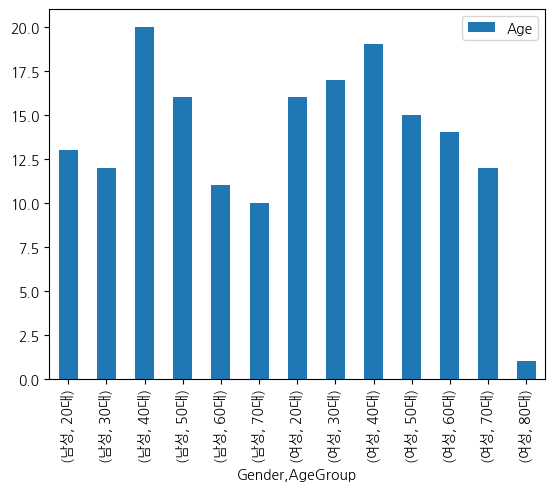

In [ ]:
# 고객이탈의 원인분석 : 이탈이유 기준(2)
df_raw[df_raw["ChurnReason"] == "Attitude of support person"  ][["Gender","Age","AgeGroup"]].groupby(['Gender','AgeGroup']).agg("count").plot.bar()
# 남녀모두 40대에서 데이터 불만족이 가장 큼
# 연령대별 차이는 남성이 두드러지고
# 여성은 비교적 균일하게 나타남

In [ ]:
df_churn_describe = df_raw[df_raw["EndDate"].isnull() == False].describe(include = "all")
df_raw.columns


Index(['CustomerId', 'Gender', 'Age', 'AgeGroup', 'Married', 'Dependents',
       'noDependents', 'Referrals', 'noReferrals', 'PaperlessBilling',
       'PaymentMethod', 'OnlineSecurity', 'OnlineBackup', 'TechSupport',
       'UnlimitedData', 'AvgDownloadGB', 'StartDate', 'EndDate', 'EndDateTmp',
       'ChurnLabel', 'ChurnScore', 'ChurnCategory', 'ChurnReason',
       'CustomerLTV', 'SatisScore', 'TotalExtraDataCharge', 'AvgRoamCharge',
       'TotalRoamCharge'],
      dtype='object')

In [ ]:
df_churn_describe.filter(items = ['CustomerId', 'Gender', 'Age', 'AgeGroup', 'Married', 'Dependents',
       'noDependents', 'Referrals', 'noReferrals', 'PaperlessBilling',
       'PaymentMethod', 'OnlineSecurity', 'OnlineBackup', 'TechSupport',
       'UnlimitedData'])
# 이탈이 높은 고객 특징:
# 1. 남성
# 2. 30대
# 3. 결혼 안함
# 4. 부양가족 없음
# 5. 추천안함
# 6. 종이영수증발급함
# 7. 계좌이체로 지불함
# 8. 보안서비스, 백업서비스, 기술지원 서비스 안함
# 9. 무제한 데이터 사용함


,CustomerId,Gender,Age,AgeGroup,Married,Dependents,noDependents,Referrals,noReferrals,PaperlessBilling,PaymentMethod,OnlineSecurity,OnlineBackup,TechSupport,UnlimitedData
count,1702,1702,1702.00,1702,1702,1702,1702.00,1702,1702.00,1702,1702,1702,1702,1702,1702
unique,1702,2,NaN,7,2,2,NaN,2,NaN,2,3,2,2,2,2
top,C-10003,남성,NaN,30대,No,No,NaN,No,NaN,Yes,계좌이체,No,No,No,Yes
freq,1,854,NaN,288,1120,1611,NaN,1108,NaN,1289,1221,1413,1197,1397,1378
mean,NaN,NaN,49.99,NaN,NaN,NaN,0.10,NaN,0.55,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,17.54,NaN,NaN,NaN,0.45,NaN,1.12,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,20.00,NaN,NaN,NaN,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,35.00,NaN,NaN,NaN,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,50.00,NaN,NaN,NaN,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,65.00,NaN,NaN,NaN,0.00,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_churn_describe.filter(items = ['StartDate', 'EndDate', 'EndDateTmp',
       'ChurnLabel', 'ChurnScore', 'ChurnCategory', 'ChurnReason',
       'CustomerLTV', 'SatisScore', 'TotalExtraDataCharge', 'AvgRoamChargqe',
       'TotalRoamCharge', 'AvgDownloadGB'])

# 이탈률 높은 고객 특징(2):
# 10. 가입날짜 : 2021-01-01
# 11. 이탈날짜 : 2021-10-01
# 12. 이탈점수 : 평균 82.51
# 13. 이탈범주 : 경쟁사
# 14. 이탈이유 : 고객센터 지원의 태도
# 15. LTV 점수 : 평균 4169.28
# 16. 만족도 점수 : 평균 1.73
# 17. 총데이터요금 : 평균 8723.97
# 18. 평균로밍요금 : 평균 26240.90
# 19. 총로밍요금 : 평균 5.36e+05
# 20. 평균다운로드GB : 22.25GB

,StartDate,EndDate,EndDateTmp,ChurnLabel,ChurnScore,ChurnCategory,ChurnReason,CustomerLTV,SatisScore,TotalExtraDataCharge,TotalRoamCharge,AvgDownloadGB
count,1702,1702,1702,1702,1702.00,1702,1702,1702.00,1702.00,1702.00,1.70e+03,1702.00
unique,80,12,12,1,NaN,5,20,NaN,NaN,NaN,NaN,NaN
top,2021-01-01,2021-10-01,2021-10-01,Yes,NaN,Competitor,Attitude of support person,NaN,NaN,NaN,NaN,NaN
freq,97,235,235,1702,NaN,762,176,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,82.51,NaN,NaN,4169.28,1.73,8723.97,5.36e+05,22.25
std,NaN,NaN,NaN,NaN,10.34,NaN,NaN,1188.12,0.81,29219.60,7.55e+05,18.14
min,NaN,NaN,NaN,NaN,65.00,NaN,NaN,2003.00,1.00,0.00,0.00e+00,0.00
25%,NaN,NaN,NaN,NaN,74.00,NaN,NaN,3123.50,1.00,0.00,4.58e+04,9.00
50%,NaN,NaN,NaN,NaN,82.00,NaN,NaN,4267.00,2.00,0.00,1.99e+05,19.00
75%,NaN,NaN,NaN,NaN,91.00,NaN,NaN,5178.75,2.00,0.00,7.04e+05,27.00


In [ ]:
num_name = df_raw.describe().columns
df_raw_num = df_raw[num_name]

In [ ]:
# 이상치 확인을 위한 데이터 변환
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_raw_num)
df_scaled=pd.DataFrame(df_scaled, columns=num_name)
df_scaled.head()

,Age,noDependents,noReferrals,AvgDownloadGB,ChurnScore,CustomerLTV,SatisScore,TotalExtraDataCharge,AvgRoamCharge,TotalRoamCharge
0,-0.58,-0.47,3.08e-03,-0.22,0.32,-1.87,-0.23,-0.28,1.26,-0.45
1,-0.04,-0.47,-6.58e-01,-0.51,0.37,0.85,1.45,0.12,-0.79,-0.79
2,0.20,-0.47,-6.58e-01,0.46,0.60,0.06,-1.92,-0.28,0.69,-0.75
3,1.89,-0.47,-3.28e-01,-0.81,1.91,-0.59,-1.92,-0.28,0.31,-0.48
4,1.71,-0.47,3.34e-01,-0.47,0.46,-0.80,-1.92,-0.28,-1.01,-0.88


<Axes: >

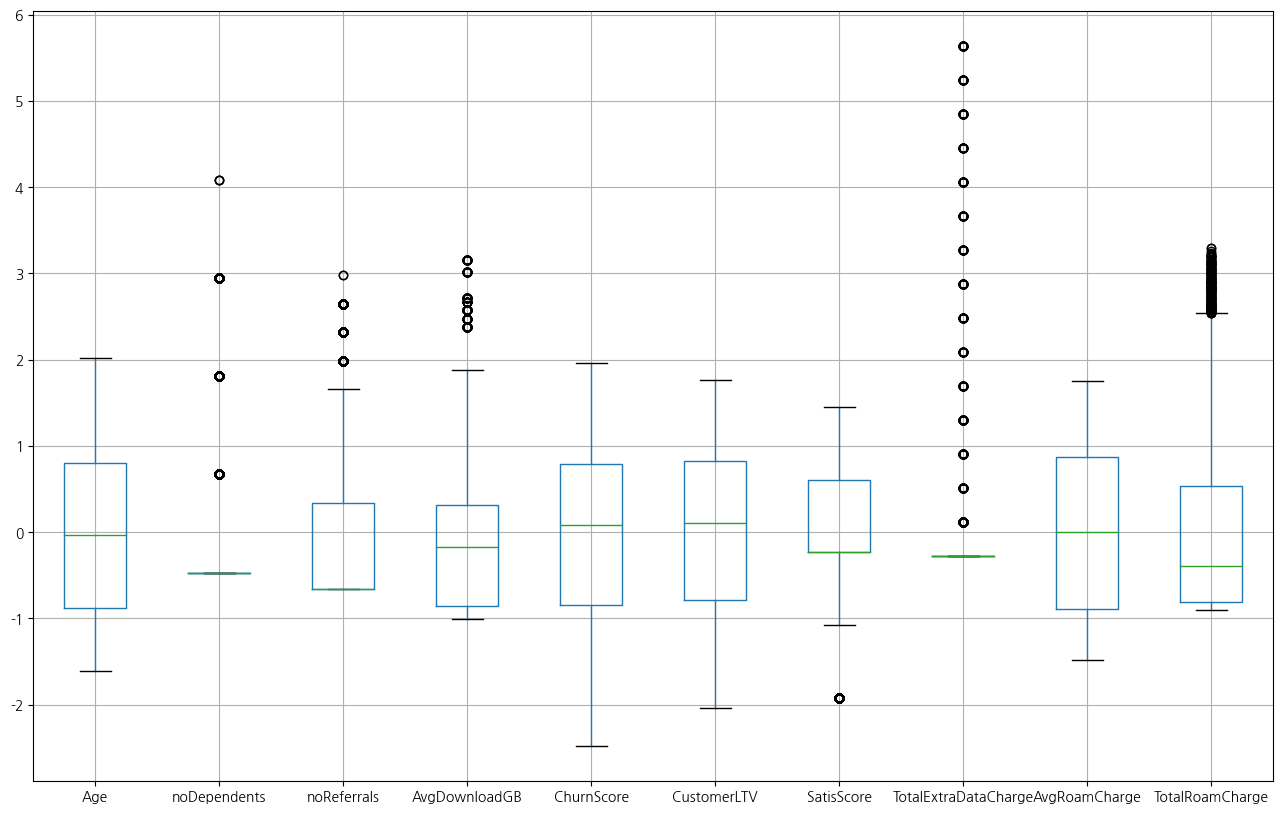

In [ ]:
df_scaled.boxplot(figsize=(16,10))

<Axes: >

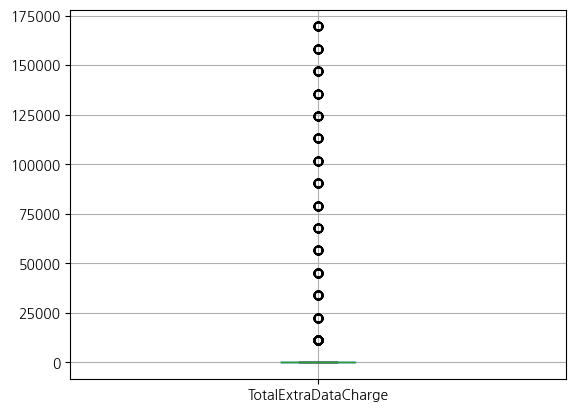

In [ ]:
df_raw[['TotalExtraDataCharge']].boxplot()

No          Axes(0.1,0.15;0.363636x0.75)
Yes    Axes(0.536364,0.15;0.363636x0.75)
dtype: object

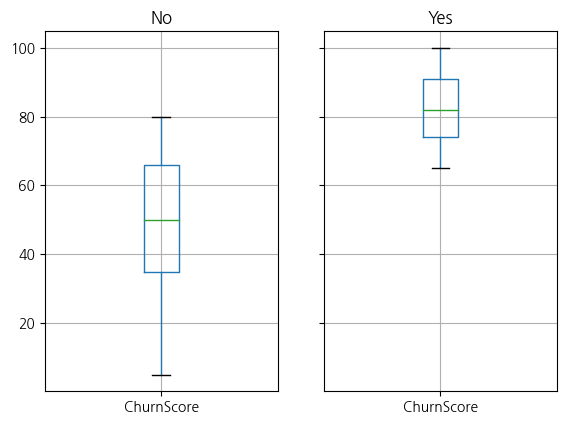

In [ ]:
df_raw[["ChurnLabel",'ChurnScore']].groupby("ChurnLabel").boxplot()
# 이탈하지 않은 쪽의 이탈점수가 낮음
# 이탈한쪽이 이탈점수 높음
# 너무나 자명한 사실

In [ ]:
# 이탈한 사람과 안한 사람의 이탈점수 평균의 차이
no_churn = df_raw[df_raw["ChurnLabel"]=="No"]['ChurnScore'].mean()
churned = df_raw[df_raw['ChurnLabel']=="Yes"]['ChurnScore'].mean()

churned - no_churn

32.41718930121077